# <center> <b> FINAL PROJECT


Sự suy giảm nhân sự trong công ty là tình trạng nhân sự nghỉ việc do các lý do tự nguyện hay không tự nguyện có thể do nghỉ hưu, từ chức hay chấm dứt hợp đồng hoặc khi công ty quyết định cắt giảm vị trí nào đó. Việc suy giảm nhân sự gây ảnh hưởng đến hiệu suất làm việc của các nhóm, chất lượng sản phẩm đầu ra, tăng chi phí tuyển dụng và đào tạo. Trong project này nhóm sẽ tập trung vào việc tìm hiểu những nguyên nhân nào dẫn đến việc suy giảm nhân sự ở công ty.<br> 
![](https://i.ibb.co/C6nVvxY/turnover-1024x680.jpg)

Member: <br>
Đào Minh Thuấn <br> 
Lương Phương Thúy <br> 
Dataset: https://www.kaggle.com/datasets/thuandao/clustered-hr-data

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
### <b> 1. CLEAN DATA

In [47]:
# Import data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency

In [48]:
sns.set_theme()

In [49]:
# Load data frame
df = pd.read_csv("HR_Analytics_Data.csv")
df

,Age\tAttrition\tBusinessTravel\tDailyRate\tDepartment\tDistanceFromHome\tEducation\tEducationField\tEmployeeCount\tEmployeeNumber\tEnvironmentSatisfaction\tGender\tHourlyRate\tJobInvolvement\tJobLevel\tJobRole\tJobSatisfaction\tMaritalStatus\tMonthlyIncome\tMonthlyRate\tNumCompaniesWorked\tOver18\tOverTime\tPercentSalaryHike\tPerformanceRating\tRelationshipSatisfaction\tStandardHours\tStockOptionLevel\tTotalWorkingYears\tTrainingTimesLastYear\tWorkLifeBalance\tYearsAtCompany\tYearsInCurrentRole\tYearsSinceLastPromotion\tYearsWithCurrManager
0,41\tYes\tTravel_Rarely\t1102\tSales\t1\t2\tLif...
1,49\tNo\tTravel_Frequently\t279\tResearch & Dev...
2,37\tYes\tTravel_Rarely\t1373\tResearch & Devel...
3,33\tNo\tTravel_Frequently\t1392\tResearch & De...
4,27\tNo\tTravel_Rarely\t591\tResearch & Develop...
...,...
1465,36\tNo\tTravel_Frequently\t884\tResearch & Dev...
1466,39\tNo\tTravel_Rarely\t613\tResearch & Develop...
1467,27\tNo\tTravel_Rarely\t155\tResearch & Develop...
1468,49\tNo\tTravel_Frequently\t1023\tSales\t2\t3\t...


In [50]:
# Thực hiện chia tách 35 columns
listSplitColumn = ["Age", "Attrition", "BusinessTravel", "DailyRate", "Department", "DistanceFromHome", "Education", "EducationField",
    "EmployeeCount", "EmployeeNumber", "EnvironmentSatisfaction", "Gender", "HourlyRate", "JobInvolvement", "JobLevel",
    "JobRole", "JobSatisfaction", "MaritalStatus", "MonthlyIncome", "MonthlyRate", "NumCompaniesWorked", "Over18", "OverTime",
    "PercentSalaryHike", "PerformanceRating", "RelationshipSatisfaction", "StandardHours", "StockOptionLevel", "TotalWorkingYears",
    "TrainingTimesLastYear", "WorkLifeBalance", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion",
    "YearsWithCurrManager"]
strColumn = "Age\tAttrition\tBusinessTravel\tDailyRate\tDepartment\tDistanceFromHome\tEducation\tEducationField\tEmployeeCount\tEmployeeNumber\tEnvironmentSatisfaction\tGender\tHourlyRate\tJobInvolvement\tJobLevel\tJobRole\tJobSatisfaction\tMaritalStatus\tMonthlyIncome\tMonthlyRate\tNumCompaniesWorked\tOver18\tOverTime\tPercentSalaryHike\tPerformanceRating\tRelationshipSatisfaction\tStandardHours\tStockOptionLevel\tTotalWorkingYears\tTrainingTimesLastYear\tWorkLifeBalance\tYearsAtCompany\tYearsInCurrentRole\tYearsSinceLastPromotion\tYearsWithCurrManager"
df[listSplitColumn] = df[strColumn].str.split("\t", expand = True)
df = df.drop(columns=[strColumn])


In [51]:
# overview data
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
### <b> 2. DATA DESCRIPTION

**1. Age:** Tuổi của nhân viên.<br>
**2. Attrition:** Hao hụt nhân sự theo phân loại Yes/No. Với Yes được hiểu nhân viên đó sẽ nghỉ việc.<br>
**3. Business Travel:** Công tác của nhân viên theo phân loại : Travel Frequently/ Rarely Travel/ Non- Travel.<br>
**4. Daily Rate:** Đây là cột biểu thị tần suất làm việc hàng ngày của nhân viên (Không sử dụng).<br>
**5. Department:** Biểu thị phòng ban làm việc của nhân viên.<br>
**6. DistanceFromHome:** Biểu thị khoảng cách từ nhà đến công ty.<br>
**7. Education:** Trình độ học vấn của nhân viên : (1 'Below College', 2 'College', 3 'Bachelor', 4 'Master', 5 'Doctor').<br>
**8. Education Field:** Môi trường giáo dục của nhân viên<br>
**9. Employee Count:** Số lượng nhân viên dưới dạng số và chỉ có duy nhất giá trị 1 (không dùng).<br>
**10.Employee Number:** Mã số nhân viên.<br>
**11. Environment Satisfaction:** Sự hài lòng về môi trường làm việc : (1 'Low', 2 'Medium', 3 'High', 4 'Very High')<br>
**12. Gender:** Phân loại giới tính: Male and female.<br>
**13. HourlyRate:** Biểu thị tỷ lệ làm việc theo giờ của nhân viên.<br>
**14. JobInvolvement:** Biểu thị sự tham gia (hăng hái) trong công việc : (1 'Low',2 'Medium',3 'High',4 'Very High')<br>
**15. JobLevel:** Biểu thị phân loại cấp độ công việc i.e., 1,2,3,4 and 5<br>
**16. JobRole:** Phân loại vai trò của nhân viên  i.e., sales executive, research scientists etc.<br>
**17. JobSatisfaction:** Mức độ hài lòng của công việc: (1 'Low',2 'Medium',3 'High',4 'Very High')<br>
**18. MaritalStatus:** Tình trạng hôn nhân của nhân viên i.e., Married, Single, Divorced etc.<br>
**19. MonthlyIncome:** Thu nhập hàng tháng của nhân viên.<br>
**20. MonthlyRate:** Tỷ lệ làm việc hàng tháng của nhân viên (không dùng).<br>
**21. NumCompaniesWorked:** Biểu thị số lượng công ty mà nhân viên đã làm việc trước đây.<br>
**22. Over18:** Biểu thị độ tuổi nhân viên có trên 18 tuổi hay không.<br>
**23. OverTime:** Biểu thị nhân viên có over time hay không.<br>
**24. PercentSalaryHike:** Biểu thị phần trăm tăng lương của nhân viên.<br>
**25. PerformanceRating:** Biểu thị hiệu suất làm việc của nhân viên nhận được (1 'Low',2 'Good', 3 'Excellent', 4 'Outstanding')<br>
**26. RelationshipSatisfaction:** Biểu thị sự gắn kết, thân thiện với đồng nghiệp (1 'Low',2 'Medium',3 'High',4 'Very High')<br>
**27. StandardHours:** Biểu thị giờ làm việc tiêu chuẩn của nhân viên.<br>
**28. StockOptionLevel:** Biểu thị mức độ đãi ngộ trong công ty cung cấp cho nhân viên về quyền mua cổ phiếu với giá ưu đãi, có 4 mức đãi ngộ  (1 'Low',2 'Medium',3 'High',4 'Very High') (Không dùng) <br>
**29. TotalWorkingYears:** Biểu thị tổng số năm làm việc của nhân viên. <br>
**30. TrainingTimesLastYear:** Biểu thị tổng số lần nhân viên được đào tạo. <br>
**31. WorkLifeBalance:** Biểu thị sự cân bằng giữa công việc và cuộc sống (1 'Bad',2 'Good',3 'Better',4 'Best')<br>
**32. YearsAtCompany:** Biểu thị tổng số năm nhân viên làm việc tại công ty hiện tại.<br>
**33. YearsInCurrentRole:** Biểu thị tổng số năm nhân viên làm việc tại vai trò công việc hiện tại tại công ty.<br>
**34. YearsSinceLastPromotion:** Biểu thị tổng số năm kể từ lần thăng chức cuối cùng của nhân viên tại công ty.<br>
**35. YearsWithCurrManager:** Biểu thị tổng số năm nhân viên làm việc dưới quyền quản lý hiện tại tại công ty.<br>

In [52]:
# Kiểm tra kiểu dữ liệu mỗi column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   object
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   object
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   object
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   object
 9   EmployeeNumber            1470 non-null   object
 10  EnvironmentSatisfaction   1470 non-null   object
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   object
 13  JobInvolvement            1470 non-null   object
 14  JobLevel                

In [53]:
# Cập nhật lại kiểu dữ liệu.
df = df.astype({
    'Age': 'int8',
    'DailyRate': 'int16',
    'DistanceFromHome': 'int8',
    'Education': 'int8',
    'EmployeeCount': 'int8',
    'EmployeeNumber': 'int16',
    'EnvironmentSatisfaction': 'int8',
    'HourlyRate': 'int8',
    'JobInvolvement': 'int8',
    'JobLevel': 'int8',
    'JobSatisfaction': 'int8',
    'MonthlyIncome': 'int16',
    'MonthlyRate': 'int16',
    'NumCompaniesWorked': 'int8',
    'PercentSalaryHike': 'int8',
    'PerformanceRating': 'int8',
    'RelationshipSatisfaction': 'int8',
    'StandardHours': 'int8',
    'StockOptionLevel': 'int8',
    'TotalWorkingYears': 'int8',
    'TrainingTimesLastYear': 'int8',
    'WorkLifeBalance': 'int8',
    'YearsAtCompany': 'int8',
    'YearsInCurrentRole': 'int8',
    'YearsSinceLastPromotion': 'int8',
    'YearsWithCurrManager': 'int8'
})

# Kiểm tra lại kiểu dữ liệu mỗi cột.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int8  
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int16 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int8  
 6   Education                 1470 non-null   int8  
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int8  
 9   EmployeeNumber            1470 non-null   int16 
 10  EnvironmentSatisfaction   1470 non-null   int8  
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int8  
 13  JobInvolvement            1470 non-null   int8  
 14  JobLevel                

In [54]:
# Load data từ "HR_employee_data.csv"
df1 = pd.read_csv("HR_employee_data.csv")

In [55]:
# Join 2 table lại sử dụng inner join
df = pd.merge(df, df1, on='EmployeeNumber', how='inner')

In [56]:
# Kiểm tra lại các column sau khi join data từ "HR_employee_data.csv"
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Emplyee name'],
      dtype='object')

In [57]:
# Đổi tên cột 'Emplyee name' THÀNH 'EmployeeName'.
df.rename(columns={'Emplyee name': 'EmployeeName'}, inplace=True)

In [58]:
# Mô tả tổng quan về data.
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [59]:
# Kiểm tra dữ liệu có duplicate hay không.
df.duplicated().sum()

np.int64(0)

In [60]:
# Kiểm tra dữ liệu có NULL hay không.
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

🟢 Không có giá trị nào bị thiếu trong tập dữ liệu. <br>
🟢 Có ba cột (EmployeeCount, Over18 và StandardHours) chỉ có 1 giá trị duy nhất sẽ không có tác dụng trong việc phân tích nên sẽ remove.

In [61]:
# Remove cột 'StandardHours', 'EmployeeCount' và 'Over18'
df.drop(columns=['StandardHours', 'EmployeeCount', 'Over18'], inplace=True)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
### <b> 2. VISUALIZATION DATA

#### <b> 2.1. TỔNG QUAN VỀ SỰ SUY GIẢM

🟢 Tổng số nhân viên: 1470
🟢 Số lượng nhân viên nam: 882
🟢 Số lượng nhân viên nữ: 588
🟢 Số lượng nhân viên suy giảm: 237
🟢 Số lượng nhân viên ở lại: 1233


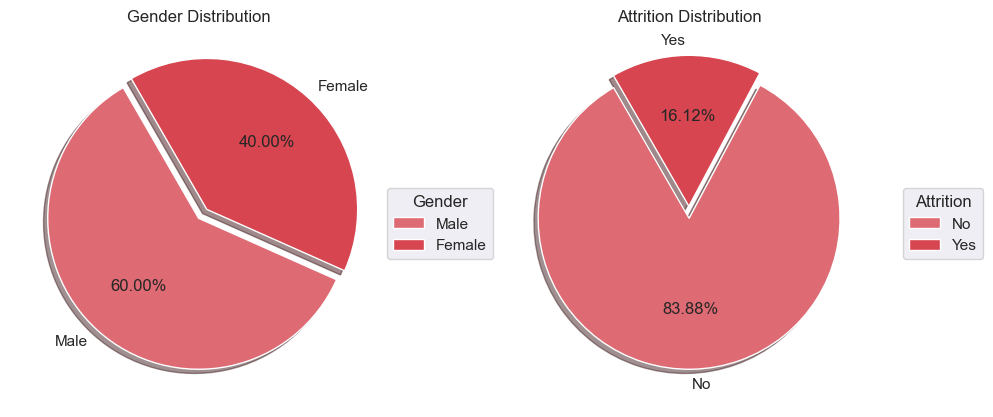

In [62]:
totalEmployees = df['EmployeeNumber'].nunique()
print(f"🟢 Tổng số nhân viên: {totalEmployees}")

totalEmployeesMale = df.loc[df['Gender'] == "Male", 'EmployeeNumber'].nunique()
print(f"🟢 Số lượng nhân viên nam: {totalEmployeesMale}")

totalEmployeesFemale = totalEmployees - totalEmployeesMale
print(f"🟢 Số lượng nhân viên nữ: {totalEmployeesFemale}")

totalEmployeesAttritionOnly = df.loc[df['Attrition'] == "Yes", 'EmployeeNumber'].nunique()
print(f"🟢 Số lượng nhân viên suy giảm: {totalEmployeesAttritionOnly}")

totalEmployeesAvtiveWorker = totalEmployees - totalEmployeesAttritionOnly
print(f"🟢 Số lượng nhân viên ở lại: {totalEmployeesAvtiveWorker}")

attriDistribution  = df['Attrition'].value_counts()
empDistribution = df['Gender'].value_counts()
ncols = 2
nrows = 2
fig, ax = plt.subplots(nrows, ncols, figsize = (ncols * 5, nrows * 5))
for r in range(0, nrows):
    if r == 0:
        for c in range(0, ncols):
            if c == 0:
                data = empDistribution
                label = empDistribution.index
                ax[r, c].set_title("Gender Distribution")
                legendTitle = "Gender"
            elif c == 1:
                data = attriDistribution
                label = attriDistribution.index
                ax[r, c].set_title("Attrition Distribution")
                legendTitle = "Attrition"
            else:
                break
            ax[r, c].pie(
                            data,
                            labels = label,
                            colors = ['#de6a73', '#d64550'],
                            autopct = '%1.2f%%',
                            startangle = 120,
                            explode = (0, 0.08),
                            shadow= True,
                        )
            ax[r, c].legend(title = legendTitle, loc = "upper right", labels = label, bbox_to_anchor = (1.3, 0.6))
    else:
        break
ax.flat[2].set_visible(False)
ax.flat[3].set_visible(False)
plt.grid(True)
plt.tight_layout()
plt.show()

🔴 Tỷ lệ nhân sự nghỉ việc ở công ty là 16,12% (chấp nhận được) điều này cho thấy công ty cũng đã có những chiến lược giữ chân những nhân viên giỏi (Key member).

#### <b> 2.2. SUY GIẢM THEO "Gender", "Age" VÀ "DistanceFromHome"

##### <b> 2.1.1. GENDER

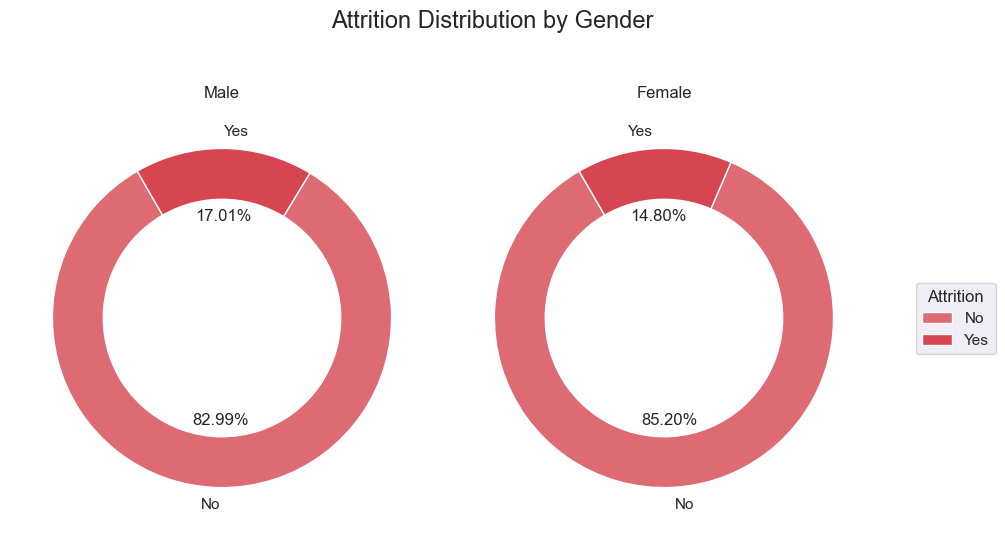

In [63]:
attriByMale  = df[df['Gender'] == "Male"]['Attrition'].value_counts()
attriByFeMale  = df[df['Gender'] == "Female"]['Attrition'].value_counts()
fig = plt.figure(figsize=(10, 6))
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

ax0.pie(
                attriByMale,
                labels = attriByMale.index,
                colors = ['#de6a73', '#d64550'],
                autopct = '%1.2f%%',
                startangle = 120,
                wedgeprops=dict(width=.3), # donut chart
                shadow= False,
            )
ax0.set_title("Male")

ax1.pie(
                attriByFeMale,
                labels = attriByFeMale.index,
                colors = ['#de6a73', '#d64550'],
                autopct = '%1.2f%%',
                startangle = 120,
                wedgeprops=dict(width=.3), # donut chart
                shadow= False,
            )
ax1.set_title("Female")

plt.suptitle('Attrition Distribution by Gender', fontsize = 17)
plt.legend(title = 'Attrition', loc = 'upper right', bbox_to_anchor = (1.3, 0.6))
plt.tight_layout()
plt.show()

In [64]:
# Chi-Square Test: https://www.scribbr.com/statistics/chi-square-test-of-independence
# Đặt giả thuyết H0 là sự suy giảm nhân sự (Attrition) không phụ thuộc vào gender.
# H1 là sự suy giảm nhân sự (Attrition) phụ thuộc vào gender.
crosstab = pd.crosstab(df['Attrition'], df['Gender'])
chi2, p, dof, expected = chi2_contingency(crosstab)

print(f"\nChi-Square Test for Gender:")
print(f"Chi2 statistic: {chi2:.3f}")
print(f"Bậc tự do: {dof}")
print(f"p - value: {p}")
if p <= 0.05:
    # BÁC BỎ GIẢ THUYẾT H0
    print("🟢 Sự suy giảm nhân sự (Attrition) phụ thuộc vào Gender")
else:
    # CHẤP NHẬN GIẢ THUYẾT H0
    print("⚪ Sự suy giảm nhân sự (Attrition) không phụ thuộc vào Gender")



Chi-Square Test for Gender:
Chi2 statistic: 1.117
Bậc tự do: 1
p - value: 0.29057244902890855
⚪ Sự suy giảm nhân sự (Attrition) không phụ thuộc vào Gender


🔴 Sự suy giảm nhân sự (Attrition) giữa nam và nữ có sự chênh lệch là 2.21%, điều này cho thấy nam giới nghỉ việc nhiều hơn nhưng sự suy giảm này không phụ thuộc vào giới tính.

##### <b> 2.1.2. AGE

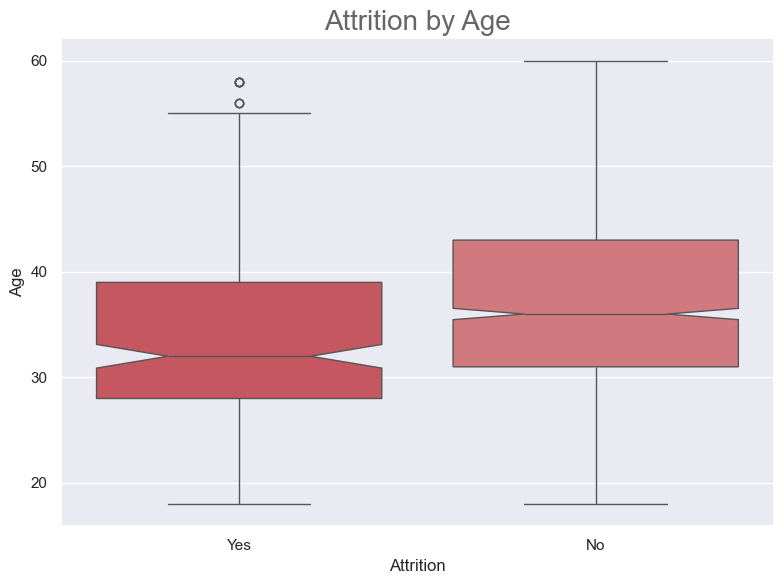

In [65]:
# Link kiến thức về boxplot: https://www.youtube.com/watch?v=5SZuIy4L2wc
plt.figure(figsize = (8, 6))
sns.boxplot(data = df, x = 'Attrition', y = 'Age', hue = 'Attrition', palette = ['#d64550', '#de6a73'], notch = True)
plt.title('Attrition by Age', loc="center", fontsize='20', color = "#666666")
plt.ylabel('Age')
plt.tight_layout()
plt.show()

🟢 Attrition Yes
* Sự suy giảm nhân sự rơi vào độ tuổi từ 28 đến 39 tuổi.<br>
* Có 25% nhân sự nghỉ việc ở độ tuổi từ 18 đến 28. <br>
* Có 50% nhân sự nghỉ việc dưới 32 tuổi và 50% nhân sự nghỉ việc trên 32 tuổi. <br>
* Có 75% nhân sự nghỉ việc ở độ tuổi từ 18 đến 39. <br>
* Độ tuổi lớn nhất là 55 tuổi và nhỏ nhất là 18 tuổi. <br>
* Ngoài ra có các giá trị ngoại vi lớn hơn giá trị phân bố trung bình điều này có nghĩa là có những nhân sự > 55 tuổi nghỉ việc.

⚪ Attrition No
* Nhân sự làm việc rơi vào độ tuổi từ 32 đến 43 tuổi.<br>
* Có 25% nhân sự nghỉ việc ở độ tuổi từ 18 đến 32. <br>
* Có 50% nhân sự nghỉ việc dưới 36 tuổi và 50% nhân sự nghỉ việc trên 36 tuổi. <br>
* Có 75% nhân sự nghỉ việc ở độ tuổi từ 18 đến 43. <br>
* Độ tuổi lớn nhất là 60 tuổi và nhỏ nhất là 18 tuổi. <br>

🔴 Từ biểu đồ trên có thể kết luận độ tuổi nghỉ việc (Attrition Yes) trẻ hơn so với những người vẫn đang tiếp tục làm việc tại công ty. Nhân sự trong công ty đang có xu hướng già hóa điều này có thể tiềm ẩn nhiều rủi ro trong công việc ví dụ như chất lượng sản phẩm làm ra không đạt yêu cầu, độ nhạy bén trong công việc cũng giảm vì lý do tuổi tác, sức khỏe,...

##### <b> 2.1.3. DISTANCE FROM HOME

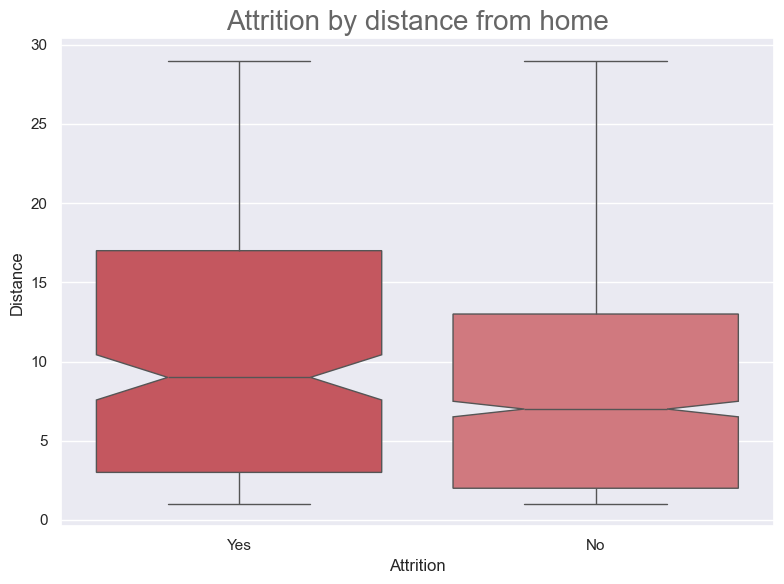

In [66]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = df, x = 'Attrition', y = 'DistanceFromHome', hue = 'Attrition',
            palette = ['#d64550', '#de6a73'], notch = True)
plt.title('Attrition by distance from home', loc="center", fontsize='20', color = "#666666")
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

🟢 Attrition Yes
* Khoảng cách từ nhà đến công ty là 3.5km đến 17km.<br>
* Có 25% nhân sự nghỉ việc có khoảng cách từ nhà đến công ty nằm trong khoảng 1km đến 3.5km. <br>
* Có 50% nhân sự nghỉ việc có khoảng cách từ nhà đến công ty nằm trong khoảng 1km đến 8km. <br>
* Có 75% nhân sự nghỉ việc có khoảng cách từ nhà đến công ty nằm trong khoảng 1km đến 17km. <br>
* Khoảng cách lớn nhất từ nhà đến công ty là 28km. <br>

⚪ Attrition No
* Khoảng cách từ nhà đến công ty là 2km đến 13Km.<br>
* Có 25% nhân sự nghỉ việc có khoảng cách từ nhà đến công ty nằm trong khoảng 1km đến 2km. <br>
* Có 50% nhân sự nghỉ việc có khoảng cách từ nhà đến công ty nằm trong khoảng 1km đến 8km. <br>
* Có 75% nhân sự nghỉ việc có khoảng cách từ nhà đến công ty nằm trong khoảng 1km đến 13km. <br>
* Khoảng cách lớn nhất từ nhà đến công ty là 28km. <br>

🔴 Từ biểu đồ trên có thể kết luận khoảng cách từ nhà đến công ty của những người nghỉ việc cao hơn, điều này ảnh hưởng đến việc suy giảm nhân sự vì khoảng cách xa nên sẽ ảnh hưởng rất nhiều đến việc dy chuyển.

#### <b> 2.3. SUY GIẢM THEO "OverTime".

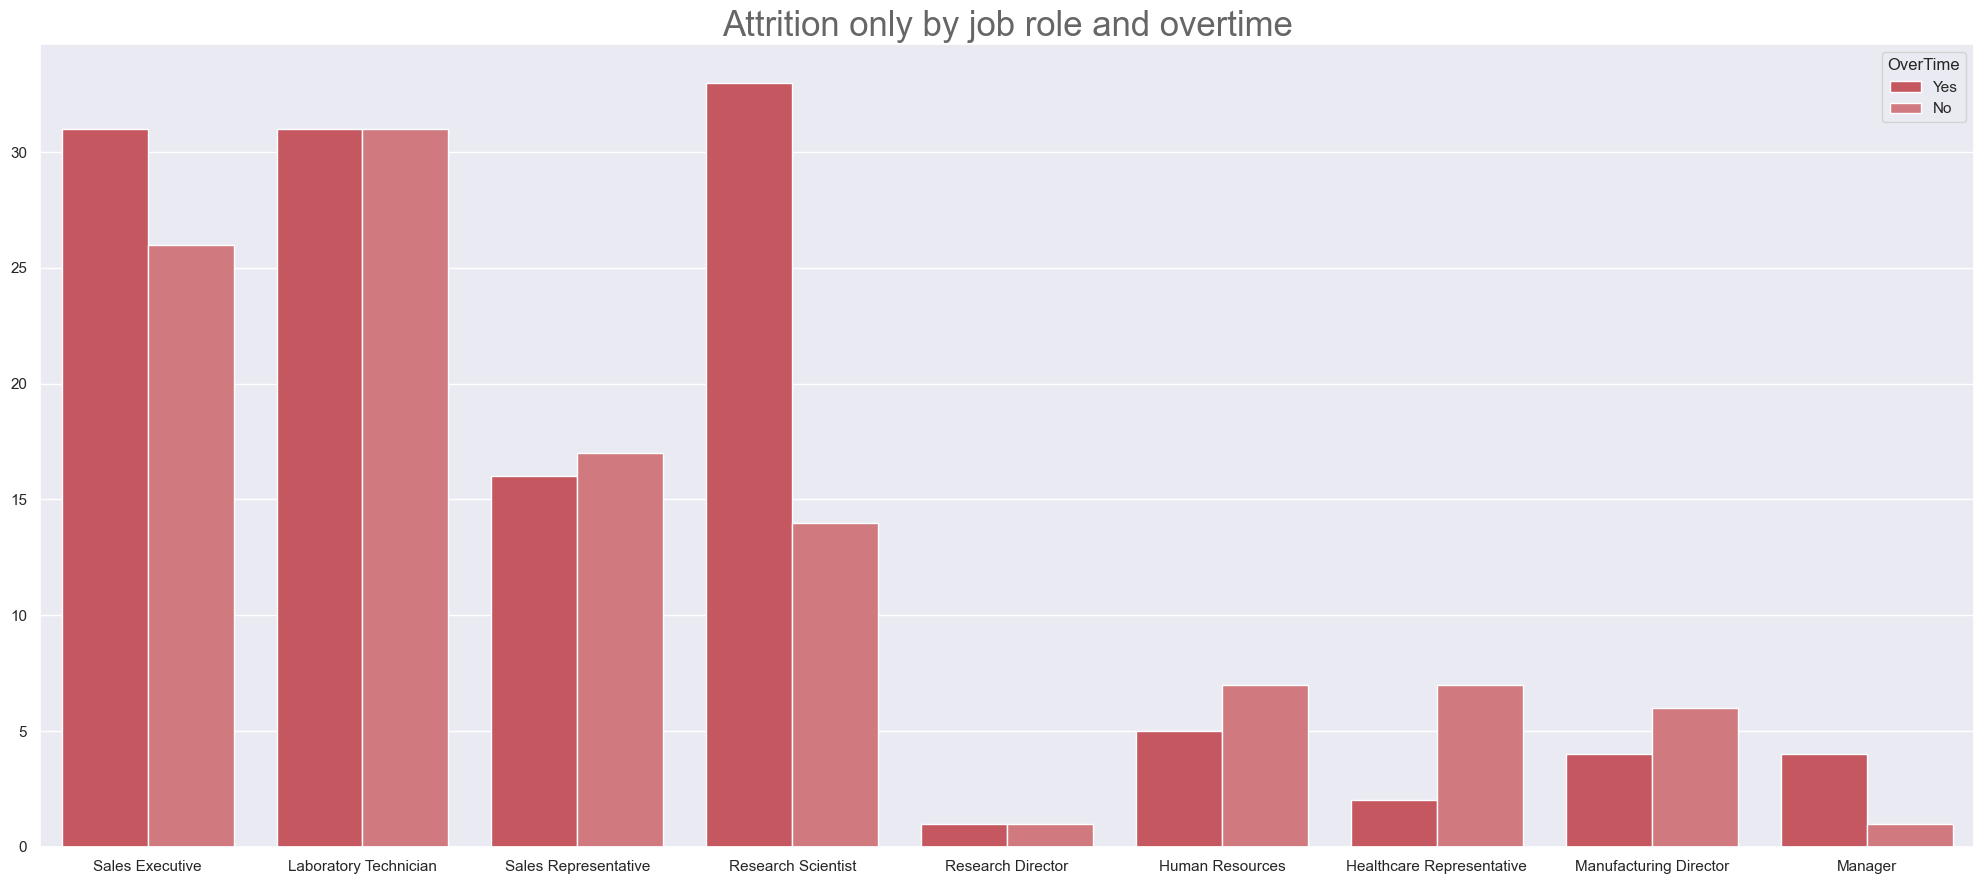

In [67]:
plt.figure(figsize=(20,9))
ax = sns.countplot(data = df[df['Attrition'] == 'Yes'], x = "JobRole", hue = "OverTime",
                   palette = ['#d64550', '#de6a73'])
# THÊM SỐ LIỆU TRÊN CÁC CỘT
# for p in ax.patches:
#     ax.annotate(f'{int(p.get_height())}', 
#                 (p.get_x() + p.get_width() / 2., p.get_height()), 
#                 ha='center', va='center', 
#                 fontsize=10, color='#666666', 
#                 xytext=(0, 5), 
#                 textcoords='offset points')

plt.title(label = "Attrition only by job role and overtime", loc="center", fontsize='25', color = "#666666")
plt.xlabel("")
plt.ylabel("")
plt.tight_layout()
plt.show()

In [68]:
crosstab = pd.crosstab(df['Attrition'], df['OverTime'])
chi2, p, dof, expected = chi2_contingency(crosstab)

print(f"\nChi-Square Test for OverTime:")
print(f"Chi2 statistic: {chi2:.3f}")
print(f"Bậc tự do: {dof}")
print(f"p - value: {p}")
if p <= 0.05:
    print("🟢 Sự suy giảm nhân sự (Attrition) phụ thuộc vào OverTime")
else:
    print("⚪ Sự suy giảm nhân sự (Attrition) không phụ thuộc vào OverTime")


Chi-Square Test for OverTime:
Chi2 statistic: 87.564
Bậc tự do: 1
p - value: 8.158423721538322e-21
🟢 Sự suy giảm nhân sự (Attrition) phụ thuộc vào OverTime


🔴 Các nhân viên thuộc nhóm: Laboratory Technician, Human Resources, Sales Executive, Research Scientist and Sales Representative roles có số lượng nhân viên làm tăng ca nhiều điều này cho thấy khối lượng công việc có thể là một yếu tố góp phần làm suy giảm nhân sự. <br>

#### <b> 2.4. ĐỘ HÀI LÒNG VỀ MÔI TRƯỜNG, ĐỒNG NGHIỆP VÀ TRONG CÔNG VIỆC

In [69]:
# TẠO columns "EnvironmentStatus", "RelationshipStatus" và "JobStatus"
choices = ["Low", "Middle", "High", "Very high"]
conditions = [
    (df['EnvironmentSatisfaction'] == 1),
    (df['EnvironmentSatisfaction'] == 2),
    (df['EnvironmentSatisfaction'] == 3),
    (df['EnvironmentSatisfaction'] == 4)
]
df['EnvironmentStatus'] = np.select(conditions, choices, default='Unknown')

conditions = [
    (df['RelationshipSatisfaction'] == 1),
    (df['RelationshipSatisfaction'] == 2),
    (df['RelationshipSatisfaction'] == 3),
    (df['RelationshipSatisfaction'] == 4)
]
df['RelationshipStatus'] = np.select(conditions, choices, default='Unknown')

conditions = [
    (df['JobSatisfaction'] == 1),
    (df['JobSatisfaction'] == 2),
    (df['JobSatisfaction'] == 3),
    (df['JobSatisfaction'] == 4)
]
df['JobStatus'] = np.select(conditions, choices, default='Unknown')
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'EmployeeName',
       'EnvironmentStatus', 'RelationshipStatus', 'JobStatus'],
      dtype='object')

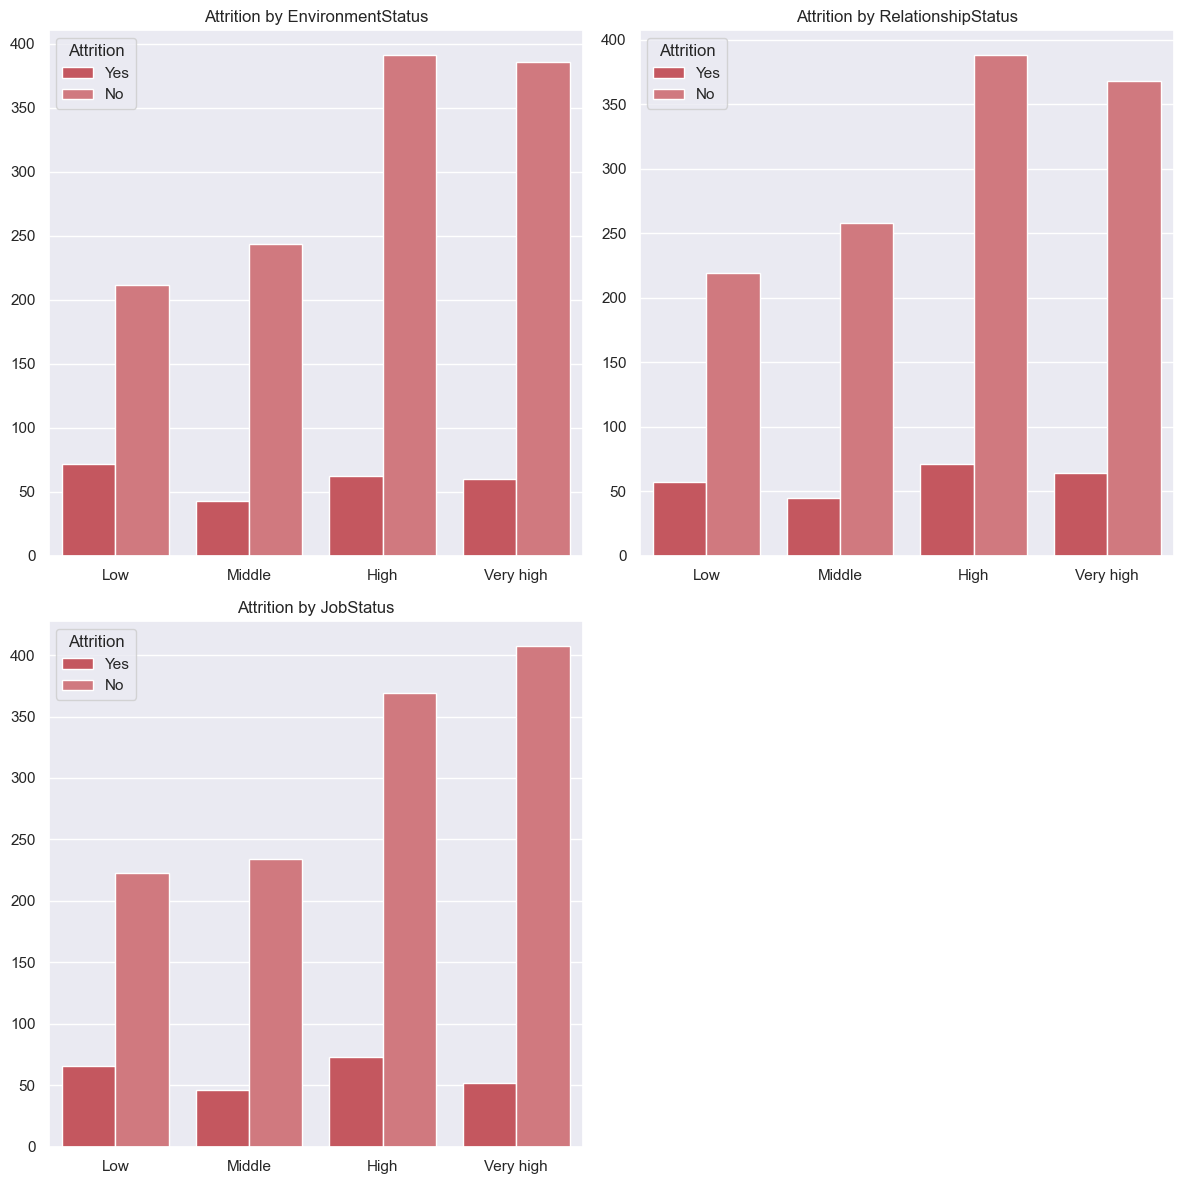

In [70]:
n_cols = 2
n_rows = 2
listSatisfaction = ['EnvironmentStatus', 'RelationshipStatus', 'JobStatus']
fig, ax = plt.subplots(nrows, n_cols, figsize = (n_cols * 6, nrows * 6))

for r in range(0, nrows):
    for c in range(0, n_cols):
        i = r * n_cols + c
        if i < len(listSatisfaction):
            ax_i = ax[r, c]
            sns.countplot(data = df, x = listSatisfaction[i], hue = "Attrition", 
                          palette = ['#d64550', '#de6a73'], ax = ax_i, order=choices)
            ax_i.set_title(f"Attrition by {listSatisfaction[i]}")
            ax_i.legend(title = "Attrition", loc = "upper left")
            ax_i.set_xlabel("")
            ax_i.set_ylabel("")
ax.flat[-1].set_visible(False)
plt.tight_layout()
plt.show()

In [71]:
for item in listSatisfaction:
    crosstab = pd.crosstab(df['Attrition'], df[item])
    chi2, p, dof, expected = chi2_contingency(crosstab)

    print(f"\nChi-Square Test for {item}:")
    print(f"Chi2 statistic: {chi2:.3f}")
    print(f"Bậc tự do: {dof}")
    print(f"p - value: {p}")
    if p <= 0.05:
        print(f"🟢 Sự suy giảm nhân sự (Attrition) phụ thuộc vào {item}")
    else:
        print(f"⚪ Sự suy giảm nhân sự (Attrition) không phụ thuộc vào {item}")
    print("------------------------------------------------------------------\n")


Chi-Square Test for EnvironmentStatus:
Chi2 statistic: 22.504
Bậc tự do: 3
p - value: 5.1234689062894205e-05
🟢 Sự suy giảm nhân sự (Attrition) phụ thuộc vào EnvironmentStatus
------------------------------------------------------------------


Chi-Square Test for RelationshipStatus:
Chi2 statistic: 5.241
Bậc tự do: 3
p - value: 0.15497244371052626
⚪ Sự suy giảm nhân sự (Attrition) không phụ thuộc vào RelationshipStatus
------------------------------------------------------------------


Chi-Square Test for JobStatus:
Chi2 statistic: 17.505
Bậc tự do: 3
p - value: 0.0005563004510387556
🟢 Sự suy giảm nhân sự (Attrition) phụ thuộc vào JobStatus
------------------------------------------------------------------



🔴 Mức độ hài lòng trong công việc (JobSatisfaction) và môi trường làm việc (EnvironmentSatisfaction) ảnh hưởng đến sự suy giảm nhân sự (Attrition). Dựa vào biểu đồ có thể thấy số lượng nhân viên có mức độ hài lòng 1 (low), 2 (middle) là khá nhiều tuy không nằm trong danh sách suy giảm nhưng tiềm ẩn nguy cơ nghỉ việc trong tương lai. <br>

#### <b> 2.5. SỰ SUY GIẢM THEO THU NHẬP.

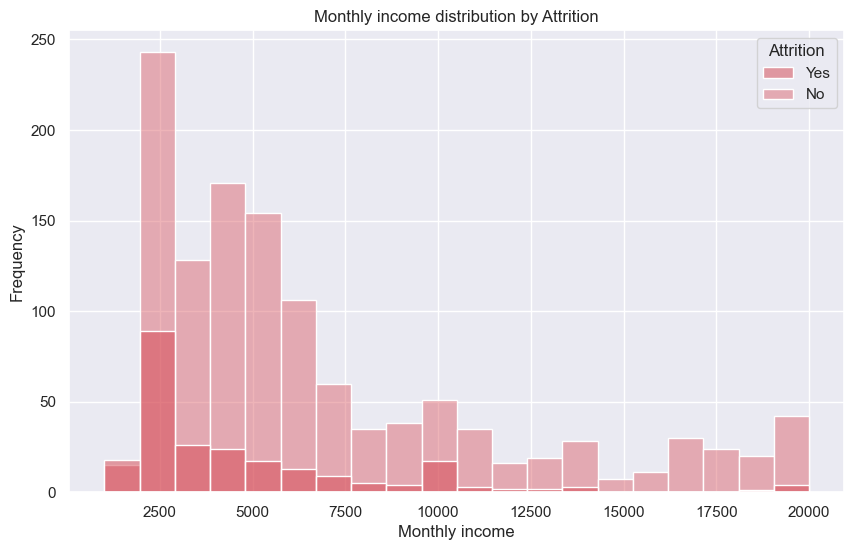

In [72]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x = "MonthlyIncome", hue="Attrition", palette = ['#d64550', '#de6a73']);
plt.title("Monthly income distribution by Attrition")
plt.xlabel('Monthly income')
plt.ylabel('Frequency')
plt.show()

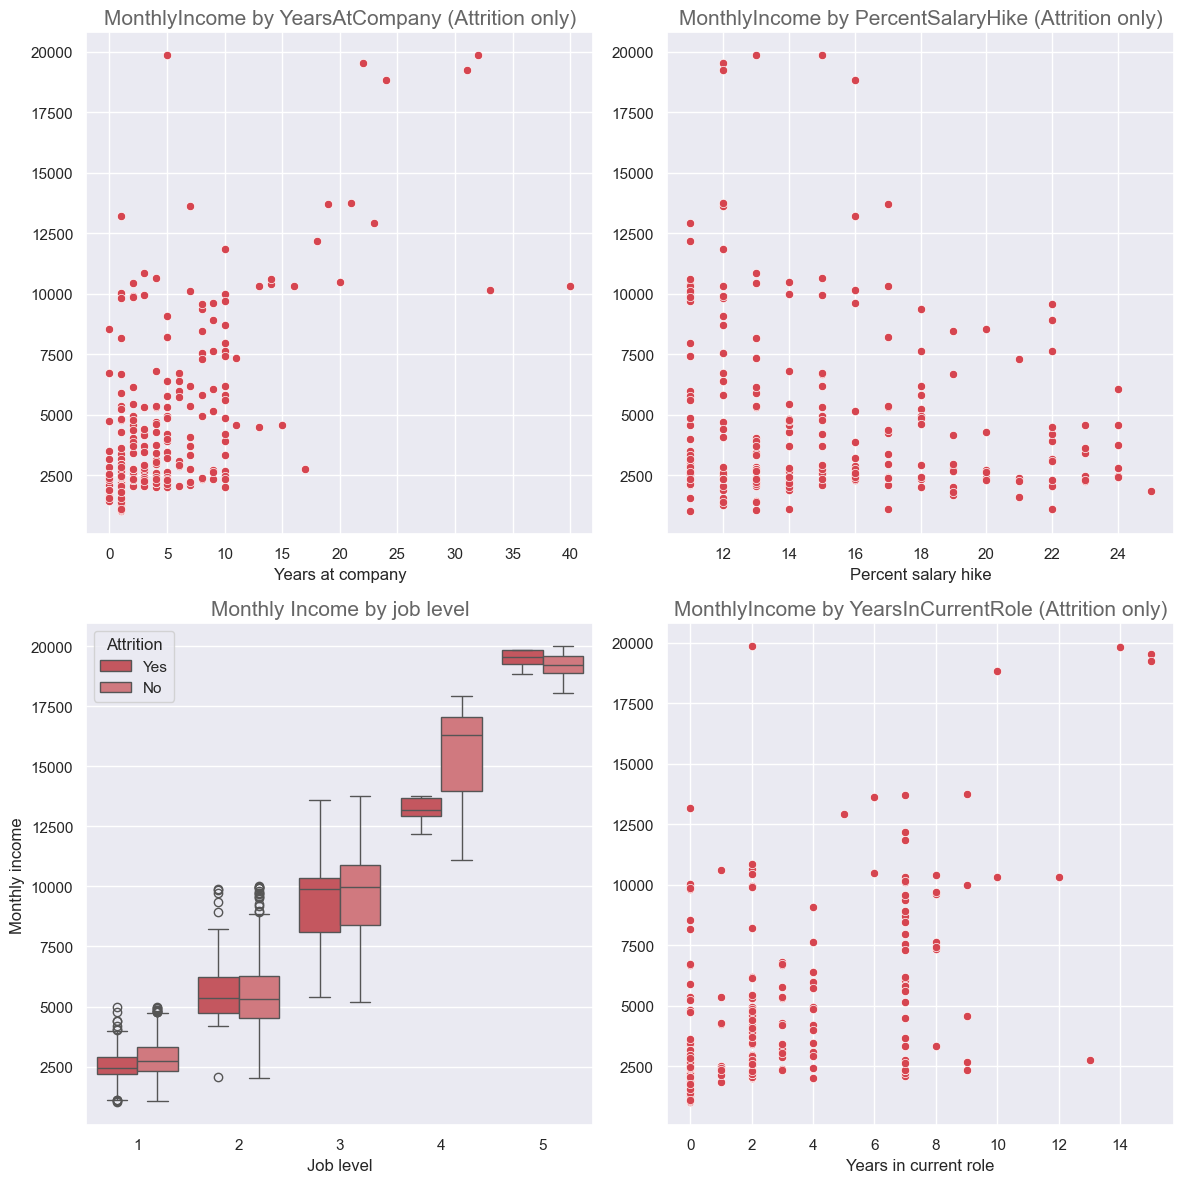

In [73]:
listFeature = ['YearsAtCompany', 'PercentSalaryHike', 'JobLevel', 'YearsInCurrentRole']
listLable = ["Years at company", "Percent salary hike", "Job level", 'Years in current role']
fig, ax = plt.subplots(nrows, n_cols, figsize = (n_cols * 6, nrows * 6))

for r in range(0, nrows):
    for c in range(0, n_cols):
        i = r * n_cols + c
        if i < len(listFeature):
            ax_i = ax[r, c]
            if i == 2:
                sns.boxplot(data = df, x = 'JobLevel', y = 'MonthlyIncome', hue = 'Attrition', 
                palette = ['#d64550', '#de6a73'], ax = ax_i)
                ax_i.set_title('Monthly Income by job level', loc="center", fontsize='15', color = "#666666")
                ax_i.set_xlabel('Job level')
                ax_i.set_ylabel('Monthly income')
            else:
                sns.scatterplot(data = df[df['Attrition'] == 'Yes'], x = listFeature[i], y = 'MonthlyIncome', color = '#d64550', ax = ax_i)
                ax_i.set_title(f"MonthlyIncome by {listFeature[i]} (Attrition only)", loc="center", fontsize='15', color = "#666666")
                ax_i.set_xlabel(listLable[i])
                ax_i.set_ylabel("")

plt.tight_layout()
plt.show()

🔴 Dựa vào biểu đồ thì sự suy giảm rơi vào những nhân viên kiếm được < 7.500 đô la mỗi tháng. Phân tích cũng cho thấy rằng hầu hết trong số họ có ít hơn 5 
năm kinh nghiệm làm việc, cho thấy những nhân viên giai đoạn đầu được trả lương thấp nên sẽ có xu hướng nghỉ việc nhiều. <br>
🔴 Hầu hết các trường hợp hao hụt đều có mức tăng lương từ 11%–15%, cho thấy tác động hạn chế đến việc giữ chân nhân viên. Những người có thu nhập cao nhận được mức tăng lương tương tự hoặc thậm chí ít hơn, cho thấy sự không phù hợp với kỳ vọng của nhân viên. <br>

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
### <b> 3. ĐÁNH GIÁ

🟢 Về môi trường làm việc thì công ty có thể đưa ra survey khảo sát về cơ sở hạ tầng, trang thiết bị máy móc, bãi đậu xe,... Để lấy phản hồi từ phía nhân viên nhằm phát hiện sớm và tiến hành nâng cấp sửa chữa để đảm bảo môi trường làm việc tốt nhất cho nhân viên. <br>
🟢 Các leader, manager có thể sắp xếp meeting 1 - 1 với memeber trong nhóm để bàn về những issue trong công việc ví dụ như: Khó khăn trong công việc, số lượng task có nhiều?, có muốn chuyển team, ... Từ đó hiểu hơn về mong muốn của member trong nhóm và tìm hướng giải quyết.<br>
🟢 Việc overtime nhiều có thể sẽ ảnh hưởng đến sức khỏe của các member nên các leader cần linh động trong việc phân bổ task hoặc sắp xếp experience member hỗ trợ cho người mới. <br>
🟢 Có thể hỗ trợ thêm phụ cấp đi lại cho những nhân viên ở xa hoặc giúp nhân viên tìm kiếm chỗ ở gần công ty để thuận tiện cho việc đi lại. <br>
🟢 Có thể luân chuyển nhân sự giữa các role dựa trên mong muốn của nhân viên điều này sẽ tránh được sự nhàm chán trong công việc do phải làm một công việc ở duy nhất một role quá lâu.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
### <b> 4. TÌNH HUỐNG

🔴 Giả sử công ty có chính sách thăng chức cho nhân viên có lần cuối thăng chức cách hiện tại 10 năm (YearsSinceLastPromotion >= 10). Sẽ tồn tại những nhân viên vừa nằm trong danh sách thăng chức cũng như nằm trong danh sách nghỉ việc thì cần lọc ra danh sách những nhân viên đó, tất nhiên họ sẽ nhận được thêm những benefit khác vì họ nằm trong danh sách cắt giảm.

In [74]:
# TẠO column "PromotionStatus"
conditions = [
    (df['YearsSinceLastPromotion'] >= 10),
    (df['YearsSinceLastPromotion'] < 10)
]
choices = ['Due for promotion', 'Not due']
df['PromotionStatus'] = np.select(conditions, choices, default='Unknown')
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'EmployeeName',
       'EnvironmentStatus', 'RelationshipStatus', 'JobStatus',
       'PromotionStatus'],
      dtype='object')

In [75]:
# Số lượng nhân viên được thăng chức.
totalEmployeesPromotion = df.loc[df['PromotionStatus'] == "Due for promotion", 'EmployeeNumber'].nunique()
print(f"🟢 Nhân viên thăng chức: {totalEmployeesPromotion}({round(totalEmployeesPromotion * 100.0 / totalEmployees, 2)}%)\n")

# Số lượng nhân viên không được thăng chức.
totalEmployeesNotDuePromotion = totalEmployees - totalEmployeesPromotion
print(f"🟢 Nhân viên không được thăng chức: {totalEmployeesNotDuePromotion}({round(totalEmployeesNotDuePromotion * 100.0 / totalEmployees, 2)}%)")

# Lấy ra danh sách nhân viên được thăng chức.
listEmployeesPromotion = df.loc[df['PromotionStatus'] == "Due for promotion", 'EmployeeName'].to_list()

🟢 Nhân viên thăng chức: 72(4.9%)

🟢 Nhân viên không được thăng chức: 1398(95.1%)


In [76]:
print(f"🔴 Nhân viên nghỉ việc: {totalEmployeesAttritionOnly}({round(totalEmployeesAttritionOnly * 100.0 / totalEmployees, 2)}%) \n")
print(f"🔴 Nhân viên ở lại tiếp tục làm việc: {totalEmployeesAvtiveWorker}({round(totalEmployeesAvtiveWorker * 100.0 / totalEmployees, 2)}%)")

# Lấy ra danh sách nhân viên nghỉ việc
listEmployeesWillBeRetrenched = df.loc[df['Attrition'] == "Yes", 'EmployeeName'].to_list()

🔴 Nhân viên nghỉ việc: 237(16.12%) 

🔴 Nhân viên ở lại tiếp tục làm việc: 1233(83.88%)


In [77]:
# Lọc ra những nhân viên nằm trong danh sách thăng chức nhưng lại bị cắt giảm.
listDuplicate = []
for item in listEmployeesPromotion:
    if item in listEmployeesWillBeRetrenched:
        listDuplicate.append(item)
    else:
        pass

print(f"🟢 Tổng số nhân viên nằm trong danh sách thăng chức nhưng lại bị cắt giảm: {len(listDuplicate)}")
print(f"🟢 Danh sách:")
for i in listDuplicate:
    print(i)

🟢 Tổng số nhân viên nằm trong danh sách thăng chức nhưng lại bị cắt giảm: 9
🟢 Danh sách:
Stephan Q Ranger
Inocencia Z Buteau
Janie P Caswell
Carolin T Loya
Clemente S Wiechmann
Carlotta T Ryles
Carmelia E Bergeron
Kaye Tubbs
Candelaria Zajicek


In [78]:
df.to_csv('HR_Analytics_Data_Clean.csv', index=False)